# Diseño de filtros

Los filtros digitales permiten la manipulación de características frecuenciales de señales digitales debidamente muestreadas. Frente a los filtros analógicos cuentan con las siguientes ventajas:

* Respuesta dinámica: El ancho de banda está limitado por la frecuencia de muestreo de la señal en lugar del comportamiento eléctrico de los amplificadores operacionales.

* Intervalo dinámico: El número de bits usados durante la cuantización de la señal son los que determinan el rango mínimo de valores que producirá el filtro.

* Conmutabilidad: Es posible almacenar en un sistema digital los parámetros del filtro y aplicarlo a múltiples señales.

* Adaptabilidad: Se pueden construir en software o hardware.

* Ausencia de problemas por los componentes: Al no usar componentes físicos no hay problemas con las tolerancias de estos, ni con el manejo de impedancia o el acople de etapas.

Se debe tener en cuenta que:  

* Los filtros IIR producen en general distorsión de fase, es decir la
fase no es lineal con la frecuencia.  

* Los filtros FIR se pueden calcular a partir de los filtros IIR, no se cumple en el caso contrario.  

* Los filtros FIR son de fase lineal.  

* El orden de un filtro IIR es mucho menor que uno FIR para unas especificaciones dadas.  

* Los filtros FIR son siempre estables.  

## Filtros FIR

Un sistema de respuesta finita al impulso, tiene una respuesta al impulso unitario que tienen un número limitado de términos. Estos sistemas son generalmente no recursivos, es decir, no requieren ninguna realimentación de la salida para su computación. La salida del sistema depende solo de valores presentes y pasados de la entrada.

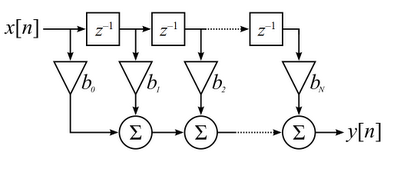

Recordemos que la relación de entrada salida de un sistema equivale a su función de transferencia, y teniendo en cuenta que una ecuación en diferencias puede ser expresada en terminos de a transformada Z, tenemos:

$y[n]=\sum_{i=1}^{N}w_ix[n-i]$

es equivalente a:

$Y[z]=\sum_{i=1}^Nb_iz^{-i}X[z]$

Por lo tanto:

$\frac{Y[z]}{X[z]}=\sum_{i=1}^Nb_iz^{-i}=H[z]$

De tal forma que la solución del sistema en el dominio de z, se resuelve por:

$Y[z]=H[z]X[z]$

Recordemos que un filtro en el dominio del tiempo se resuelve como una convolución de la señal con los coeficientes del filtro:

$y[n]=h[n]*x[n]$

vemos entonces que una convolución en el tiempo equivale a una multiplicación en z.:

En resumen podemos ver que la funcion de trasferencias esta dada por:

$H[z]=\frac{Y[z]}{X[z]}$

## Filtros IIR

Los filtros IIR presentan una respuesta infinita al impulso y la salida depende tanto de valores presentes y pasados de la entrada, como de valores pasados de la salida. Por lo anterior los filtros IIR son sistemas realimentados y por lo tanto es necesario evaluar su estabilidad (polos diferentes de cero).

La función de transferencia de un filtro IIR es de la siguiente forma:
\begin{equation}
H[z]=\frac{b_0+b_1z^{-1}+b_2z^{-2}+...+b_nz^{-n}}{1-a_1z^{-1}-a_2z^{-2}...-a_nz^{-n}}=\frac{\sum_{i=0}^{N}b_1z^{-i}}{1-\sum_{i=0}^{N}a_iz^{-1}}=\frac{Y[z]}{X[z]}
\end{equation}

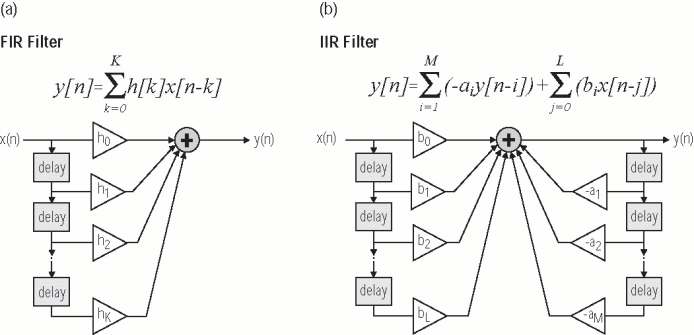

Para evaluar la estabilidad de los sitemas realimentados, es necesario revisar la teoria de la transformada Z.

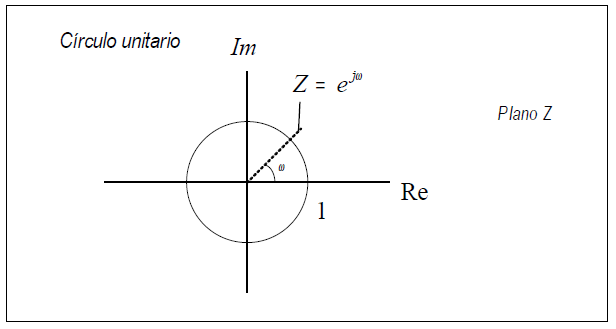

En un sistema es importante evaluar los ceros y los polos a partir de

---

la función de transferencia:

*   Ceros:  Las soluciones que hacen el numerador igual a cero
*   Polos: Las soluciones que hacen el denominador igual a cero.

En el plano z se puede determinar si un sistema es estable si los polos

están dentro del circulo unitario. Los ceros no tienen incidencia en la estabilidad, por lo tanto pueden estar ubicados en cualquier lugar del plano z.


## Ejercicio

Proponga una secuencia sinusoidal x_e (n), con 0≤n≤1000, F_0=0,01Hz y F_s=25Hz. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética x_e (n) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

y_e(n) = αx_e(n-D)+w(n)

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y w(n)  representa el ruido generado por la electrónica de los sistemas de adquisición.

Genere las secuencias ficticias x_e (n) y y_e (n), implemente w(n)  como una secuencia de ruido Gaussiano con media cero y varianza σ^2=0,01, establezca α=0,8 y un retraso D=15 muestras. Grafique ambas señales.


In [2]:
# importación de librerías
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

Text(0.5, 0, 'Tiempo (s)')

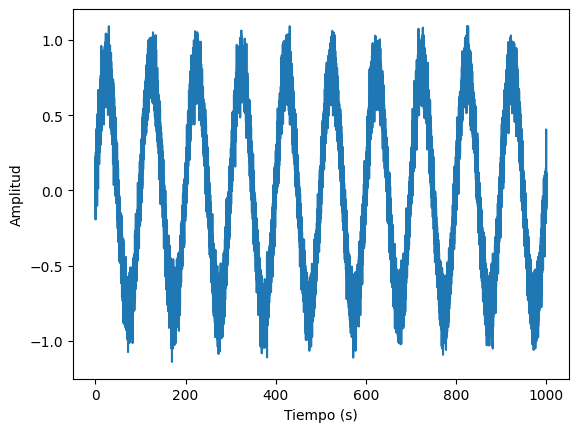

In [3]:
# creación de x_e, y_e, w_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+15/Fs)) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retrado.

plt.plot(n,y_e)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")


La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y W_n: Frecuencia de corte. Para filtros digitales W_n está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. W_n es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.

Diseñe un filtro FIR pasa bajas para la señal y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.


Text(0.5, 0, 'Tiempo (s)')

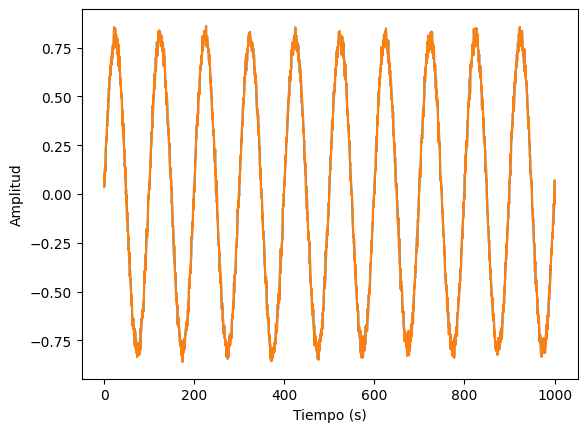

In [12]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
lowpass_32 = signal.firwin(33+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_f_30 = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicación del filtro
y_f_32 = signal.filtfilt(b=lowpass_32,a=1,x=y_e) # aplicación del filtro

plt.plot(n,y_f_30)
plt.plot(n,y_f_32)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

La siguiente función permite visulizar la repuesta en frecuencia de un filtro dado, muy util para corroborar el comportamietno del filtro diseñado

In [8]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

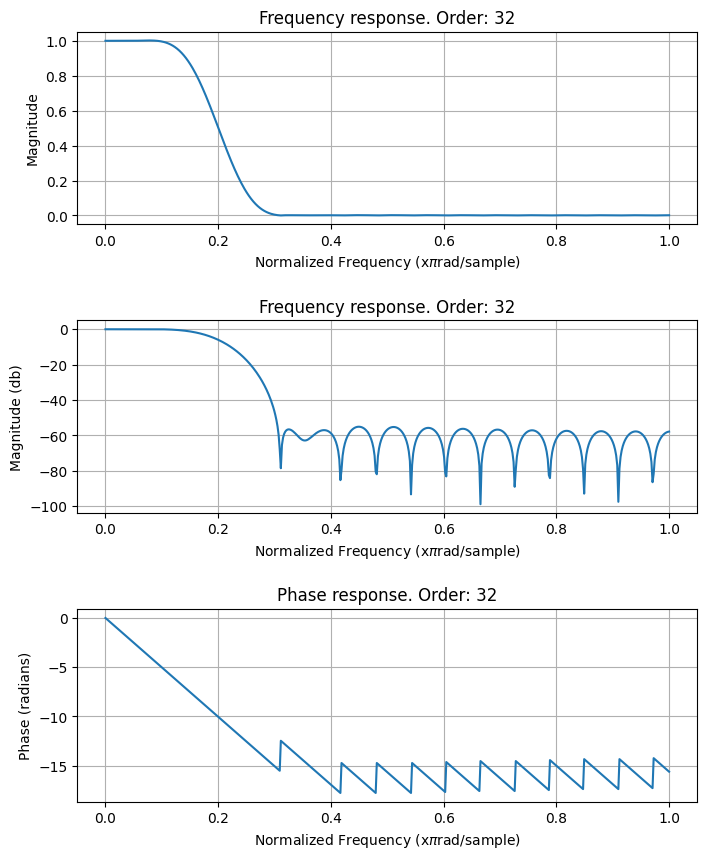

In [6]:
mfreqz(b=lowpass,a=1,order=order)